For this homework, make sure that you format your notbook nicely and cite all sources in the appropriate sections. Programmatically generate or embed any figures or graphs that you need.

Names: __Rajat Keshri, Samanvya Tripathi, Tannishtha Mondal__

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Step 1: Train your own word embeddings
--------------------------------

(describe the provided dataset that you have chosen here)

Describe what data set you have chosen to compare and contrast with the your chosen provided dataset. Make sure to describe where it comes from and it's general properties.

(describe your dataset here)

In [2]:
!pip install --upgrade gensim==4.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 10.0 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [3]:
!pip install python-Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.0/174.0 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 31.7 MB/s eta 0:00:00


In [4]:
# import your libraries here
import pandas as pd
import re
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
from matplotlib import pyplot
import itertools


### a) Train embeddings on GIVEN dataset

In [5]:
# code to train your word embeddings

# Read the file and prepare the training data 
# so that it is in the following format

# data = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
# 			['this', 'is', 'the', 'second', 'sentence'],
# 			['yet', 'another', 'sentence'],
# 			['one', 'more', 'sentence'],
# 			['and', 'the', 'final', 'sentence']]

def preprocess_text(text):
    preprocessed = re.sub('[^A-Za-z0-9]+', '', text).lower()
    return preprocessed

# train_path = "Dataset/spooky-author-identification/train.csv"
train_path = "/content/drive/MyDrive/NLP/Dataset/spooky-author-identification/train.csv"

# test_path = "Dataset/spooky-author-identification/test.csv"
test_path = "/content/drive/MyDrive/NLP/Dataset/spooky-author-identification/test.csv"

# open file and store in array
train_sentences = []
df_train = pd.read_csv(train_path)
for index, row in df_train.iterrows():
    temp = []
    for t in row["text"].split(" "):
        temp.append(preprocess_text(t))
    train_sentences.append(["<s>"] + temp + ["</s>"])

flat_array = itertools.chain(*train_sentences)
vocab_set = set(flat_array)
vocab_len = len(vocab_set)

test_sentences = []
df_test = pd.read_csv(test_path)
for index, row in df_test.iterrows():
    temp = []
    for t in row["text"].split(" "):
        temp.append(preprocess_text(t))
    test_sentences.append(["<s>"] + temp + ["</s>"])


In [6]:
# The dimension of word embedding. 
# This variable will be used throughout the program
# you may vary this as you desire
EMBEDDINGS_SIZE = 200

# Train the Word2Vec model from Gensim. 
# Below are the hyperparameters that are most relevant. 
# But feel free to explore other 
# options too:
sg = 0 # CBOW
window = 5
size = EMBEDDINGS_SIZE
min_count = 5 # The minimum count of words to consider when training the model
workers = 5 # number of threads

model_first = Word2Vec(train_sentences, vector_size=size, window=window, min_count=min_count, sg=sg, workers=workers, seed=20)
model_first.wv.most_similar('water', topn=10)

[('lake', 0.9815720915794373),
 ('wall', 0.9781194925308228),
 ('box', 0.9763081669807434),
 ('hill', 0.9752393364906311),
 ('mountain', 0.974955141544342),
 ('ground', 0.9747728705406189),
 ('hole', 0.9745840430259705),
 ('surface', 0.9729934930801392),
 ('horizon', 0.9728304147720337),
 ('coast', 0.9725297689437866)]

In [7]:
# if you save your Word2Vec as the variable model, this will 
# print out the vocabulary size
print('Vocab size {}'.format(len(model_first.wv.index_to_key)))

Vocab size 8524


In [8]:
# You can save file in txt format, then load later if you wish.
model_save_path = "/content/drive/MyDrive/NLP/word2vec_models/"
model_first.save(model_save_path+"model_first.bin")
model_first.wv.save_word2vec_format(model_save_path+'embeddings_first.txt', binary=False)
new_model = Word2Vec.load(model_save_path+'model_first.bin')
new_model.wv.most_similar('water', topn=10)

[('lake', 0.9815720915794373),
 ('wall', 0.9781194925308228),
 ('box', 0.9763081669807434),
 ('hill', 0.9752393364906311),
 ('mountain', 0.974955141544342),
 ('ground', 0.9747728705406189),
 ('hole', 0.9745840430259705),
 ('surface', 0.9729934930801392),
 ('horizon', 0.9728304147720337),
 ('coast', 0.9725297689437866)]

### b) Train embedding on YOUR dataset

In [9]:
# then do a second data set

# def preprocess_text(text):
#     preprocessed = re.sub('[^A-Za-z0-9]+', '', text).lower()
#     return preprocessed

# open file and store in array
amazon_train_sentences = []

train_data_path = "/content/drive/MyDrive/NLP/Dataset/Amazon Reviews/cleaned_reviews.csv"
# train_data_path = "Dataset/Amazon Reviews/cleaned_reviews.csv"

df_train = pd.read_csv(train_data_path)
for index, row in df_train.iterrows():
    temp = []
    if str(row["cleaned_review"]) != "nan":
        #print(row["cleaned_review"])
        for t in row["cleaned_review"].split(" "):
            temp.append(preprocess_text(t))
        amazon_train_sentences.append(["<s>"] + temp + ["</s>"])


# training

# The dimension of word embedding. 
# This variable will be used throughout the program
# you may vary this as you desire
EMBEDDINGS_SIZE = 200

# Train the Word2Vec model from Gensim. 
# Below are the hyperparameters that are most relevant. 
# But feel free to explore other 
# options too:
sg = 0 # CBOW
window = 5
size = EMBEDDINGS_SIZE
min_count = 5 # The minimum count of words to consider when training the model
workers = 5 # number of threads

model_second = Word2Vec(amazon_train_sentences, vector_size=size, window=window, min_count=min_count, sg=sg, workers=workers, seed=20)
model_second.wv.most_similar('water', topn=10)

[('tangled', 0.8599939942359924),
 ('switching', 0.8457894325256348),
 ('static', 0.8342710137367249),
 ('slowing', 0.8282396197319031),
 ('spot', 0.8266583681106567),
 ('rain', 0.8248844146728516),
 ('pushed', 0.816827118396759),
 ('pause', 0.811481773853302),
 ('spill', 0.8106010556221008),
 ('double', 0.8078108429908752)]

In [10]:
# You can save file in txt format, then load later if you wish.
model_second.save(model_save_path+'model_second.bin')
model_second.wv.save_word2vec_format(model_save_path+'embeddings_second.txt', binary=False)
new_model = Word2Vec.load(model_save_path+'model_second.bin')
new_model.wv.most_similar('water', topn=10)

[('tangled', 0.8599939942359924),
 ('switching', 0.8457894325256348),
 ('static', 0.8342710137367249),
 ('slowing', 0.8282396197319031),
 ('spot', 0.8266583681106567),
 ('rain', 0.8248844146728516),
 ('pushed', 0.816827118396759),
 ('pause', 0.811481773853302),
 ('spill', 0.8106010556221008),
 ('double', 0.8078108429908752)]

What text-normalization and pre-processing did you do and why? __YOUR ANSWER HERE__

Step 2: Evaluate the differences between the word embeddings
----------------------------

(make sure to include graphs, figures, and paragraphs with full sentences)

In [11]:
def tsne_plot_3d(title, label, embeddings, a=1):
    fig = plt.figure()
    ax = Axes3D(fig)
    colors = cm.rainbow(np.linspace(0, 1, 1))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], embeddings[:, 2], c=colors, alpha=a, label=label)
    plt.legend(loc=4)
    plt.title(title)
    plt.show()

def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()

#----------------------------------------------------------------

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


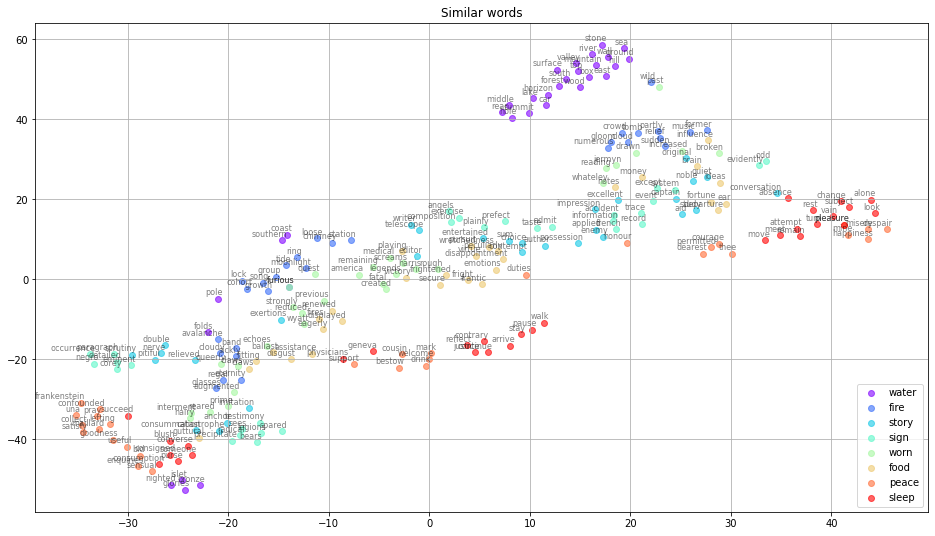

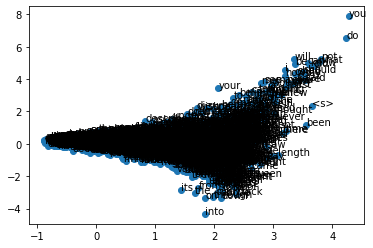

In [12]:
model_first = Word2Vec.load(model_save_path+'model_first.bin')

keys = ['water', 'fire', 'story',
        'sign', 'worn', 'food', 'peace', 'sleep']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model_first.wv.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model_first.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)
    
# 2d
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

tsne_plot_similar_words('Similar words', keys, embeddings_en_2d, word_clusters, 0.6,
                        model_save_path+'similar_words.png')


"""
# 3d
words_wp = []
embeddings_wp = []
for word in list(model_first.wv.key_to_index):
    embeddings_wp.append(model_first.wv[word])
    words_wp.append(word)
tsne_wp_3d = TSNE(perplexity=30, n_components=3, init='pca', n_iter=3500, random_state=12)
embeddings_wp_3d = tsne_wp_3d.fit_transform(embeddings_wp)
tsne_plot_3d('Visualizing Embeddings using t-SNE', 'Model 1', embeddings_wp_3d, a=0.1)
"""

# 2d
X = model_first.wv[model_first.wv.index_to_key]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model_first.wv.index_to_key)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()






/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


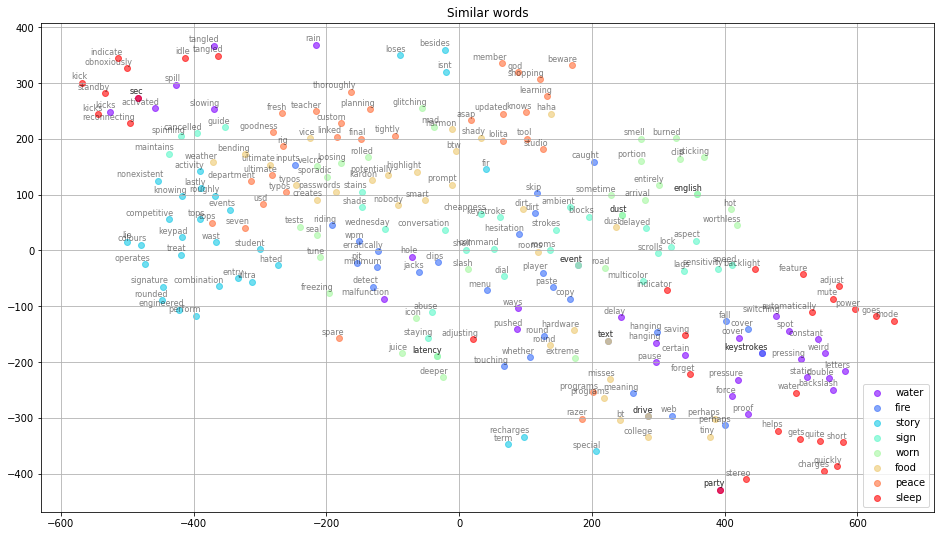

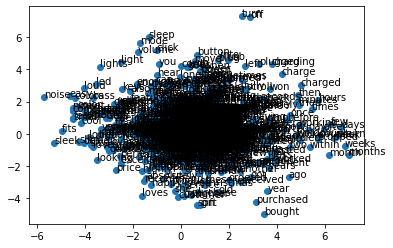

In [13]:
model_second = Word2Vec.load(model_save_path+'model_second.bin')

keys = ['water', 'fire', 'story',
        'sign', 'worn', 'food', 'peace', 'sleep']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model_second.wv.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model_second.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)
    
# 2d
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

tsne_plot_similar_words('Similar words', keys, embeddings_en_2d, word_clusters, 0.6,
                        model_save_path+'amazon_similar_words.png')


"""
# 3d
words_wp = []
embeddings_wp = []
for word in list(model_second.wv.key_to_index):
    embeddings_wp.append(model_second.wv[word])
    words_wp.append(word)
tsne_wp_3d = TSNE(perplexity=30, n_components=3, init='pca', n_iter=3500, random_state=12)
embeddings_wp_3d = tsne_wp_3d.fit_transform(embeddings_wp)
tsne_plot_3d('Visualizing Embeddings using t-SNE', 'Model 2', embeddings_wp_3d, a=0.1)
"""

# 2d
X = model_second.wv[model_second.wv.index_to_key]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model_second.wv.index_to_key)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()



##Write down your analysis:

Cite your sources:
-------------

Step 3: Feedforward Neural Language Model
--------------------------

### a) First, encode  your text into integers

In [14]:
# Importing utility functions from Keras
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Embedding

# The size of the ngram language model you want to train
# change as needed for your experiments
NGRAM = 3 

# Initializing a Tokenizer
# It is used to vectorize a text corpus. Here, it just creates a mapping from 
# word to a unique index. (Note: Indexing starts from 0)
# Example:
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(data)
# encoded = tokenizer.texts_to_sequences(data)


In [15]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_sentences)
encoded = tokenizer.texts_to_sequences(train_sentences)

In [16]:
assert len(encoded) == len(train_sentences)

In [17]:
print(train_sentences[0])

['<s>', 'this', 'process', 'however', 'afforded', 'me', 'no', 'means', 'of', 'ascertaining', 'the', 'dimensions', 'of', 'my', 'dungeon', 'as', 'i', 'might', 'make', 'its', 'circuit', 'and', 'return', 'to', 'the', 'point', 'whence', 'i', 'set', 'out', 'without', 'being', 'aware', 'of', 'the', 'fact', 'so', 'perfectly', 'uniform', 'seemed', 'the', 'wall', '</s>']


In [18]:
tokenizer.word_index['this']

28

In [19]:
print(encoded[0])

[3, 28, 2957, 146, 1376, 24, 39, 296, 2, 7444, 1, 2454, 2, 12, 4566, 18, 7, 81, 182, 49, 4258, 5, 297, 6, 1, 251, 1947, 7, 329, 76, 137, 126, 893, 2, 1, 315, 41, 1442, 4939, 101, 1, 432, 4]


### b) Next, prepare your sequences from text

#### Fixed ngram based sequences 

In [20]:
from tqdm import tqdm

In [21]:
def generate_ngram_training_samples(ngram: list):
    '''
    Takes the encoded data (list of lists) and 
    generates the training samples out of it.
    Parameters:
    up to you, we've put in what we used
    but you can add/remove as needed
    return: 
    list of lists in the format [[x1, x2, ... , x(n-1), y], ...]
    '''
    x_train = []
    y_train = []
    for idx in tqdm(range(len(ngram)), desc="Progress"):
      for i in range(0,len(ngram[idx]) - NGRAM + 1):
        ngram_set = ngram[idx][i:i+NGRAM]
        x_train.append(ngram_set[:-1])
        y_train.append(ngram_set[-1])
      
    return x_train, y_train

In [22]:
x_train, y_train = generate_ngram_training_samples(encoded)

Progress: 100%|██████████| 19579/19579 [00:01<00:00, 14108.45it/s]


In [23]:
x_train[:5]

[[3, 28], [28, 2957], [2957, 146], [146, 1376], [1376, 24]]

In [24]:
y_train[:5]

[2957, 146, 1376, 24, 39]

### c) Then, split the sequences into X and y and create a Data Generator

In [25]:
# Note here that the sequences were in the form: 
# sequence = [x1, x2, ... , x(n-1), y]
# We still need to separate it into [[x1, x2, ... , x(n-1)], ...], [y1, y2, ...]

In [26]:
print(vocab_len)

25407


In [27]:
word2embedding = {}
index2embedding = {}

In [28]:
def read_embeddings():
    '''Loads and parses embeddings trained in earlier.
    Parameters and return values are up to you.
    '''
    
    # you may find generating the following two dicts useful:
    # word to embedding : {'the':[0....], ...}
    # index to embedding : {1:[0....], ...} 
    # use your tokenizer's word_index to find the index of
    # a given word
    
    for word in vocab_set:
      if word in model_first.wv:
        word2embedding[word] = model_first.wv[word]
        index2embedding[tokenizer.word_index[word]] = model_first.wv[word]

      else:
        word2embedding[word] = np.zeros((EMBEDDINGS_SIZE,))
        index2embedding[tokenizer.word_index[word]] = np.zeros((EMBEDDINGS_SIZE,))

In [29]:
read_embeddings()

In [30]:
assert len(word2embedding) == len(index2embedding)

In [39]:
len(model_first.wv)

8524

In [38]:
vocab_len

25407

In [32]:
def data_generator(X: list, y: list, num_sequences_per_batch: int):
    '''
    Returns data generator to be used by feed_forward
    https://wiki.python.org/moin/Generators
    https://realpython.com/introduction-to-python-generators/
    
    Yields batches of embeddings and labels to go with them.
    Use one hot vectors to encode the labels 
    (see the to_categorical function)
    
    '''
    num_batches = len(X) // num_sequences_per_batch

    while True:
      for i in range(num_batches):
        batch_X = X[i * num_sequences_per_batch: (i+1) * num_sequences_per_batch]
        batch_Y = y[i * num_sequences_per_batch: (i+1) * num_sequences_per_batch]

        batch_X_embeddings = []
        for sequence in batch_X:
          seq_embed = [index2embedding.get(word) for word in sequence]
          batch_X_embeddings.append(seq_embed)

        batch_Y_one_hot = to_categorical(batch_Y, num_classes=vocab_len)

        yield np.array(batch_X_embeddings), np.array(batch_Y_one_hot)




In [33]:
# Examples
# initialize data_generator
num_sequences_per_batch = 128 # this is the batch size
steps_per_epoch = len(x_train)//num_sequences_per_batch  # Number of batches per epoch
train_generator = data_generator(x_train, y_train, num_sequences_per_batch)

sample=next(train_generator) # this is how you get data out of generators
sample[0].shape # (batch_size, (n-1)*EMBEDDING_SIZE)  (128, 200)

(128, 2, 200)

In [34]:
sample[1].shape # (batch_size, |V|) to_categorical

(128, 25407)

### d) Train your models

In [47]:
import tensorflow as tf

In [43]:
print(model_first.wv.index_to_key)

['the', 'of', '<s>', '</s>', 'and', 'to', 'i', 'a', 'in', 'was', 'that', 'my', 'it', 'had', 'he', 'with', 'his', 'as', 'for', 'which', 'but', 'not', 'at', 'me', 'from', 'by', 'is', 'this', 'on', 'be', 'her', 'were', 'have', 'all', 'you', 'an', 'we', 'or', 'no', 'one', 'so', 'him', 'when', 'been', 'they', 'upon', 'there', 'could', 'its', 'she', 'would', 'more', 'now', 'their', 'what', 'some', 'our', 'are', 'into', 'than', 'will', 'very', 'who', 'if', 'them', 'only', 'then', 'up', 'these', 'before', 'about', 'man', 'any', 'time', 'yet', 'out', 'said', 'even', 'did', 'your', 'might', 'after', 'old', 'like', 'first', 'us', 'must', 'most', 'through', 'over', 'never', 'made', 'life', '', 'night', 'found', 'other', 'such', 'should', 'do', 'seemed', 'eyes', 'every', 'little', 'while', 'those', 'still', 'day', 'myself', 'great', 'long', 'where', 'has', 'saw', 'own', 'many', 'well', 'again', 'came', 'much', 'down', 'may', 'thought', 'how', 'two', 'can', 'being', 'once', 'see', 'here', 'say', 'ev

In [45]:
embedding_matrix = np.zeros((len(model_first.wv), EMBEDDINGS_SIZE))
for i, word in enumerate(model_first.wv.index_to_key):
    if i >= vocab_len:
        break
    embedding_vector = model_first.wv[word]
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [53]:
# code to train a feedforward neural language model 
# on a set of given word embeddings
# make sure not to just copy + paste to train your two models

# Define the model architecture using Keras Sequential API

# loss = tf.losses.SparseCategoricalCrossentropy(from_logits = False)

model_vocab_len = len(model_first.wv)

model = Sequential()
model.add(Embedding(model_vocab_len,EMBEDDINGS_SIZE,weights=[embedding_matrix], input_length=model_vocab_len, trainable=False))
model.add(SimpleRNN((NGRAM-1)*EMBEDDINGS_SIZE, input_shape=(NGRAM-1,EMBEDDINGS_SIZE), ))
model.add(Dense(model_vocab_len, activation='softmax'))
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [54]:
# Start training the model
model.fit(x=train_generator, 
          steps_per_epoch=steps_per_epoch,
          epochs=1)

ValueError: ignored

### e) Generate Sentences

In [ ]:
# generate a sequence from the model
def generate_seq(model: Sequential, 
                 tokenizer: Tokenizer, 
                 seed: list, 
                 n_words: int):
    '''
    Parameters:
        model: your neural network
        tokenizer: the keras preprocessing tokenizer
        seed: [w1, w2, w(n-1)]
        n_words: generate a sentence of length n_words
    Returns: string sentence
    '''
    pass

### f) Compare your generated sentences

Sources Cited
----------------------------
